In [7]:
import time
import sys
import os

# 현재 파일(main.ipynb)이 있는 디렉토리의 부모 디렉토리를 sys.path에 추가
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [8]:
# INFO 
from gameInfo import *
from hyperParams import *
from setDevice import *

# CODES
from state.ver2 import *
from network.resnet import *
from trainer.ver1 import *
from eval.ver1 import *
from selfplay.ver1 import *
from tester.ver2 import *

In [11]:
model = Network(N_RESIDUAL_BLOCK, N_KERNEL, STATE_DIM, N_ACTIONS)
params = torch.load(f"{F_PATH}/latest_model_weight.pth", weights_only=False)
# params = torch.load(f"{F_PATH}/best_model_weight.pth", weights_only=False)
# params = torch.load("/Users/ijimin/Documents/GitHub/AiGO/Omok/Jimin/model/Jpub/best_model_weight_2.pth", weights_only=False)
model.load_state_dict(params)

RuntimeError: Error(s) in loading state_dict for Network:
	size mismatch for conv_layer.conv.weight: copying a param with shape torch.Size([128, 3, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 4, 3, 3]).

Alpha Zero's Action is : (7, 7)


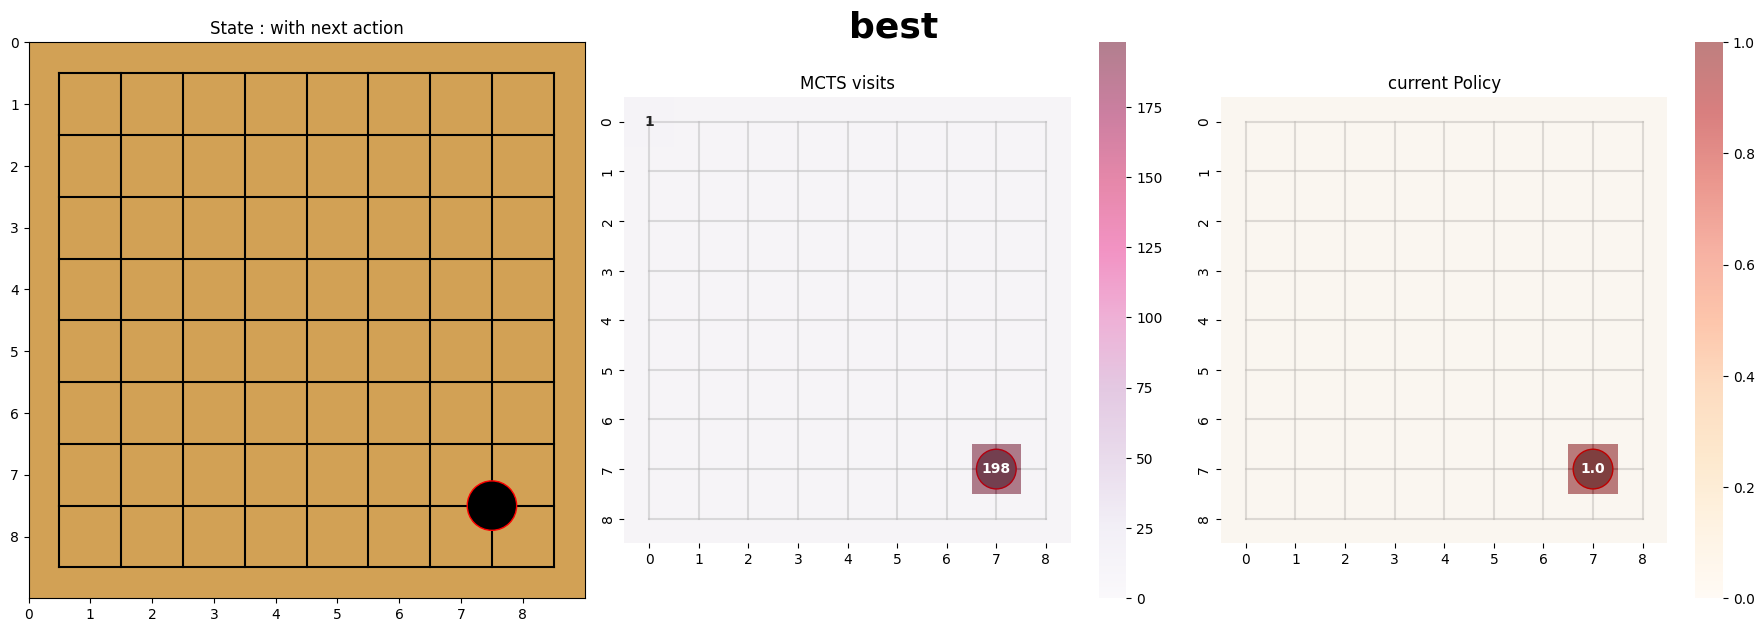

ValueError: invalid literal for int() with base 10: ''

In [10]:
# vs_human = ModelvsHuman(eval_network.best_model)

vs_human = ModelvsHuman(model)
vs_human()

In [5]:
def flatten_idx(coord):
    return coord[0] * STATE_SHAPE[1] + coord[1]